# Golden rule savings rate
(long run interest rate)

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

Sure, I can help you with that. To calculate the savings rate in the Solow-Swan model, we need to use the equation for steady state capital per effective worker, which is given by:
```k_star = (s * A * (L / K) ** (1 - alpha) / delta) ** (1 / (alpha - 1))```
where:
*	k_star is the steady state capital per effective worker
*	s is the savings rate
*	A is the level of technology
*	L is the labor force
*	K is the total stock of capital
*	alpha is the share of capital in output
*	delta is the depreciation rate

To solve for s, we can rearrange the above equation as:

```s = ((delta + n + g) / (A * (L / K) ** (1 - alpha))) ** (1 / alpha)```

where:
*	n is the rate of population growth
*	g is the rate of technological progress


In [1]:
def savings_rate(K, L, A, alpha, delta, n, g):
    """
    Calculates the savings rate required to achieve steady state capital per effective worker
    given the values of K, L, A, alpha, delta, n, and g.
    """
    s = ((delta + n + g) / (A * (L / K) ** (1 - alpha))) ** (1 / alpha)
    return s


In [13]:
s = savings_rate(K=100, L=10, A=1, alpha=0.3, delta=0.1, n=0.02, g=0.01)
print(s)

0.23977901640852475


# Data

In [5]:
df = pd.read_excel('pwt1001.xlsx', sheet_name = 'Data')
df.head()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,emp x avh,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df_pan = df[df['country'] == 'Panama']
df_pan.head()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,emp x avh,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
9240,PAN,Panama,Balboa,1950,2078.012207,1921.755249,0.885651,NaN,NaN,NaN,...,0.106793,-0.400704,0.084311,0.153162,0.131216,0.080722,0.102351,0.090788,0.120985,NaN
9241,PAN,Panama,Balboa,1951,1996.005859,1901.684326,0.908532,NaN,NaN,NaN,...,0.112405,-0.430872,0.064015,0.166374,0.139399,0.074093,0.101690,0.093115,0.132908,NaN
9242,PAN,Panama,Balboa,1952,2187.624023,2050.210449,0.932863,NaN,NaN,NaN,...,0.098670,-0.434843,0.058567,0.156638,0.137192,0.083935,0.108251,0.093171,0.132033,NaN
9243,PAN,Panama,Balboa,1953,2315.174561,2193.881836,0.954802,NaN,NaN,NaN,...,0.091398,-0.359453,0.079405,0.156600,0.137115,0.078497,0.115268,0.100838,0.130280,NaN
9244,PAN,Panama,Balboa,1954,2486.115234,2331.908936,0.977504,NaN,NaN,NaN,...,0.081896,-0.350062,0.066534,0.152390,0.129525,0.080320,0.122086,0.097309,0.121526,NaN


important columns:
* rgdpo = Output-side real GDP at chained PPPs (in mil. 2017USD)
* pop= Population (in millions)
* emp = Number of persons engaged (in millions)
* ccon	 = Real consumption of households and government, at current PPPs (in mil. 2017USD)
* cn = Capital stock at current PPPs (in mil. 2017USD)
* ctfp = TFP level at current PPPs (USA=1)

In [36]:
df_pan = df_pan[['year','rgdpo', 'pop','emp' ,'ccon', 'cn', 'ctfp']]
df_pan = df_pan[~df_pan['ctfp'].isna()]
df_pan.reset_index(inplace = True, drop = True)
df_pan.head()

,year,rgdpo,pop,emp,ccon,cn,ctfp
0,1969,6775.033691,1.477365,0.4203,6192.045410,9836.221680,0.937487
1,1970,8086.922852,1.519285,0.4343,6954.911621,11342.275391,1.044254
2,1971,8992.350586,1.563093,0.4413,7487.617676,12949.618164,1.071301
3,1972,9551.375977,1.607796,0.4554,7760.539551,14960.575195,1.027299
4,1973,10033.276367,1.653212,0.4641,7904.164551,16842.597656,0.978292


Get rates of growth:

* n is the rate of population growth
* g is the rate of technological progress

In [37]:
df_pan['pop_pct'] = df_pan['pop'].pct_change()
df_pan['ctfp_pct'] = df_pan['ctfp'].pct_change()

df_pan.dropna(inplace = True)
df_pan.reset_index(inplace = True, drop = True)

df_pan['cycle_pop'], df_pan['trend_pop'] = sm.tsa.filters.hpfilter(df_pan['pop_pct'], 100)
df_pan['cycle_ctfp'], df_pan['trend_ctfp'] = sm.tsa.filters.hpfilter(df_pan['ctfp_pct'], 100)
n = df_pan['trend_pop'].mean()
g = df_pan['trend_ctfp'].mean()
print(n, 'Population growth rate')
print(g, 'Technology growth rate, measured by TFP')

0.021347081796005276 Population growth rate
-0.0019058575789706283 Technology growth rate, measured by TFP


In [75]:
s_list = []
# alpha de paises latam 0.212
# delta comun 0.04

for i in range(len(df_pan)):
    
    
    
    k = df_pan.at[i,'cn'] * 1000000
    l = df_pan.at[i,'emp'] * 1000000
    a = df_pan.at[i,'ctfp'] 
    
    s = savings_rate(K=k, L=l, A=a, alpha=0.212, delta=0.07, n=n, g=0.05)
    s_list.append(s)
    
df_pan['s'] = s_list

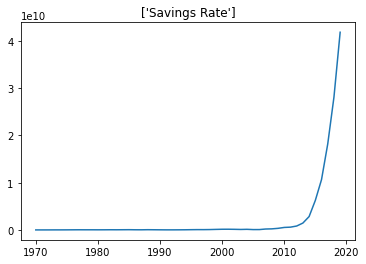

In [77]:
plt.plot(df_pan['year'], df_pan['s'])
plt.title(['Savings Rate'])
plt.show()

In [53]:
df_pan.tail()

,year,rgdpo,pop,emp,ccon,cn,ctfp,pop_pct,ctfp_pct,cycle_pop,trend_pop,cycle_ctfp,trend_ctfp,s
45,2015,98364.796875,3.968487,1.7335,67553.828125,316194.75000,0.885939,0.017218,-0.054503,0.000039,0.017179,-0.035130,-0.019373,2.872476e+06
46,2016,107763.398438,4.037078,1.7708,75141.828125,366964.96875,0.874616,0.017284,-0.012780,0.000193,0.017091,0.010894,-0.023674,3.592180e+06
47,2017,120981.968750,4.106769,1.7858,79979.726562,430519.31250,0.879652,0.017263,0.005758,0.000258,0.017005,0.033948,-0.028190,4.443051e+06
48,2018,124973.335938,4.176869,1.8675,83402.140625,471409.56250,0.831839,0.017069,-0.054355,0.000153,0.016916,-0.021350,-0.033005,5.474295e+06
49,2019,126883.187500,4.246439,1.9199,86509.289062,510780.31250,0.796792,0.016656,-0.042131,-0.000170,0.016826,-0.004269,-0.037862,6.596140e+06
